In [2]:
import pandas as pd
import geopandas as gpd
import tszip
import matplotlib.pyplot as plt
import geodatasets
import sys
sys.path.append("/Users/jameskitchens/Documents/GitHub/terracotta")
import terracotta as tct
import importlib
importlib.reload(tct)

<module 'terracotta' from '/Users/jameskitchens/Documents/GitHub/terracotta/terracotta/__init__.py'>

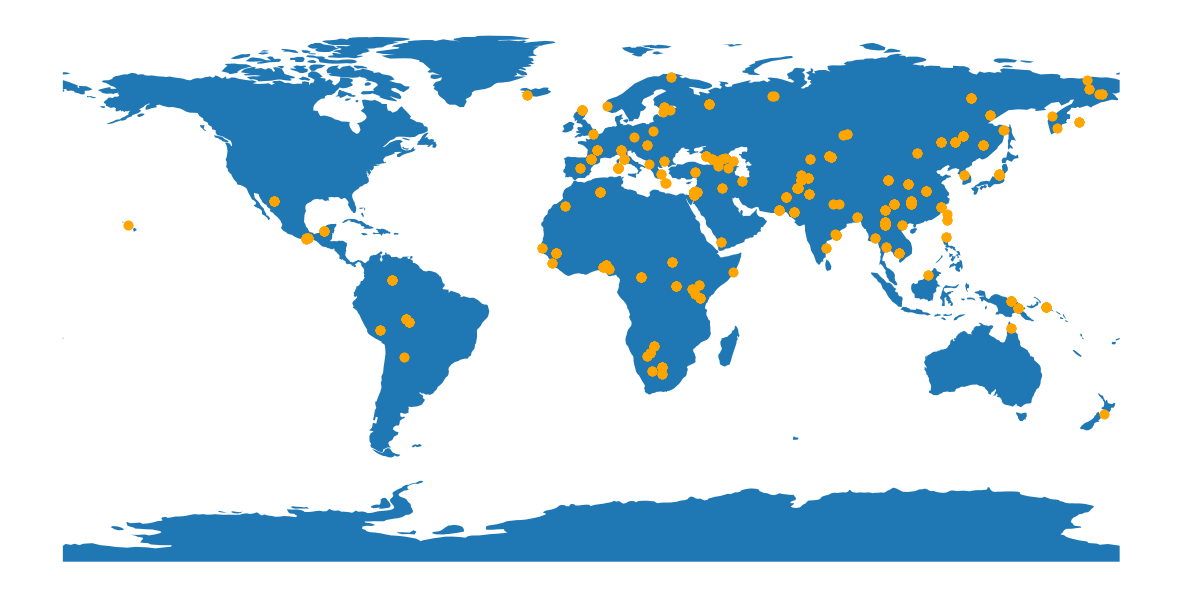

In [4]:
ts_17 = tszip.decompress("hgdp_tgp_sgdp_high_cov_ancients_chr17_p.dated.trees.tsz")

output = open("sample_locations.csv", "w")
output.write("id,lat,lon\n")
for sample in ts_17.samples():
    lat_lon = ts_17.individual(ts_17.node(sample).individual).location
    if len(lat_lon) == 2:
        output.write(f'%s,%s,%s\n' % (sample, lat_lon[0], lat_lon[1]))
output.close()

gdf = gpd.read_file(geodatasets.get_url("naturalearth land"))
base = gdf.plot(figsize=(15,15))

sample_locs = pd.read_csv("sample_locations.csv")
sample_locs = gpd.GeoDataFrame(sample_locs, geometry=gpd.GeoSeries.from_xy(sample_locs["lon"], sample_locs["lat"]), crs=4326)
sample_locs.plot(ax=base, color="orange")

plt.axis("off")
plt.savefig("wohns_17_p_samples_on_world_map.png")
plt.show()